In [1]:
#import all necessary libraries
import os

from pyspark.sql.functions import lit
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import matplotlib.pyplot as plt

import numpy, PIL
from PIL import Image

spark = SparkSession \
    .builder \
    .master("local") \
    .appName("review_and_category_analytics") \
    .config("spark.executor.memory", '8g') \
    .config('spark.executor.cores', '4') \
    .config('spark.cores.max', '4') \
    .config("spark.driver.memory",'8g') \
    .getOrCreate()

sc = spark.sparkContext

sqlCtx = SQLContext(sc)

## Create Pie Chart

In [2]:
#Load classification table
class_df = sqlCtx.read.\
    format("csv").\
    option("header", "true").\
    option("inferSchema", "true").\
    load("data/galaxyClasses.csv")

class_df.show(10)

+--------+------+----+------+
|GalaxyID|Smooth|Edge|Spiral|
+--------+------+----+------+
|  100008|     0|   0|     1|
|  100023|     0|   0|     1|
|  100053|     1|   0|     0|
|  100078|     1|   0|     0|
|  100090|     1|   0|     0|
|  100122|     1|   0|     0|
|  100123|     0|   0|     0|
|  100128|     1|   0|     0|
|  100134|     0|   0|     1|
|  100143|     0|   1|     0|
+--------+------+----+------+
only showing top 10 rows



In [3]:
#make data for pie chart

labels = ["Smooth", "Edge", "Spiral", "Other"]
count = []

count.append(
    class_df.where(F.col("Smooth") == 1).count()
)

count.append(
    class_df.where(F.col("Edge") == 1).count()
)

count.append(
    class_df.where(F.col("Spiral") == 1).count()
)

count.append(
    class_df.count()-count[0]-count[1]-count[2]
)

In [4]:
count

[25866, 6626, 15074, 14010]

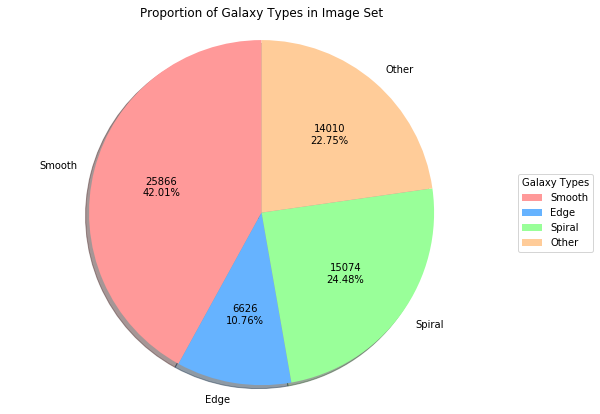

In [4]:
#Make pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig, ax = plt.subplots(figsize=(9,7), subplot_kw=dict(aspect="equal"))

p, tx, autotexts = plt.pie(count, labels=labels, colors=colors,
        autopct="", shadow=True, startangle = 90)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(str(count[i]) + '\n' + str(round(count[i]/sum(count) * 100, 2)) + '%'))

ax.legend(p, labels,
          title="Galaxy Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
ax.set_title("Proportion of Galaxy Types in Image Set")
plt.show()

## Average Images

In [6]:
spirals=os.listdir("data/galaxy_images_classified/spiral/")
edges=os.listdir("data/galaxy_images_classified/edge/")
smooths=os.listdir("data/galaxy_images_classified/smooth/")
others=os.listdir("data/galaxy_images_classified/other/")

n = 5

spiral_list=["data/galaxy_images_classified/spiral/" + filename for filename in spirals[:n]]
edge_list=["data/galaxy_images_classified/edge/" + filename for filename in edges[:n]]
smooth_list=["data/galaxy_images_classified/smooth/" + filename for filename in smooths[:n]]
other_list=["data/galaxy_images_classified/other/" + filename for filename in others[:n]]

# Assuming all images are the same size, get dimensions of first image
w,h=Image.open(spiral_list[0]).size

In [7]:
#Spiral Average

# Create a numpy array of floats to store the average (assume RGB images)
arr=numpy.zeros((h,w,3),numpy.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in spiral_list:
    imarr=numpy.array(Image.open(im),dtype=numpy.float)
    arr=arr+imarr/n

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("AverageSpiral.png")

In [8]:
#Edge Average

# Create a numpy array of floats to store the average (assume RGB images)
arr=numpy.zeros((h,w,3),numpy.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in edge_list:
    imarr=numpy.array(Image.open(im),dtype=numpy.float)
    arr=arr+imarr/n

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("AverageEdge.png")

In [9]:
#Smooth Average

# Create a numpy array of floats to store the average (assume RGB images)
arr=numpy.zeros((h,w,3),numpy.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in smooth_list:
    imarr=numpy.array(Image.open(im),dtype=numpy.float)
    arr=arr+imarr/n

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("AverageSmooth.png")

In [10]:
#Other Average

# Create a numpy array of floats to store the average (assume RGB images)
arr=numpy.zeros((h,w,3),numpy.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in other_list:
    imarr=numpy.array(Image.open(im),dtype=numpy.float)
    arr=arr+imarr/n

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("AverageOther.png")